# 결정트리

```from sklearn.tree import DecisionTreeClassifier```
* 결정트리 생성 함수 호출

```X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)```
* 훈련, 시험 모델 분리

```model = DecisionTreeClassifier(max_depth = 4)```
* 결정트리 모델 생성
* max_depth: 옵셔널 파라미터, 최대 트리깊이 결정

```model.fit(X_train, y_train)```
* 모델 훈련

```model.predict(X_test)```
* 테스트셋으로 예측

```model.score(X_test, y_test)```
* 예측값과 실제값 비교 하여 정확도 리턴

```model.feature_importances_```
* 속성 중요도 array 리턴

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [5]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = pd.DataFrame(iris_data.target, columns = ['class'])
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [12]:
model = DecisionTreeClassifier(max_depth = 4)

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [14]:
model.predict(X_test)

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [16]:
model.score(X_test, y_test) #분류 확률

0.9

In [18]:
importances = model.feature_importances_

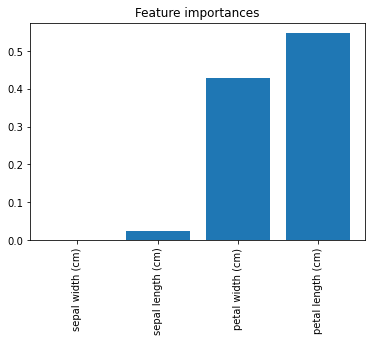

In [21]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation = 90)
plt.show()
# petal length가 가장 중요한 속성

In [22]:
model.feature_importances_

array([0.02378049, 0.        , 0.54764808, 0.42857143])